# FIR FILTER DESIGN WITH LEAST SQUARES

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

# Steps 1 and 2

## Define frequency domain shape, Cuttoffs and transition Width 

In [17]:
# Defining Filter parameters for Band Pass Filter

srate   = 1024 # Hz
Nyquist = srate/2 # Nyquist rate is very important parameter for filter design.
cutoff  = [30,50] # These are two cutoff frequencies i.e lower = 30  and upper = 50
transw  = 0.1  # Transition width is 10 %
order   = int( 15*srate/cutoff[0] ) # order parameter is also very important. Here order is taken as 9 times the sampling rate
                                       # and then divide with lowest frequency.Filter order is also called filter taps

    

# order must be odd
if order % 2 == 0:
    order += 1

# Other filter parameters

desired_shape = [ 0, 0, 1, 1, 0, 0 ]
frequencies = [0, cutoff[0]-cutoff[0]*transw, cutoff[0], cutoff[1], cutoff[1]+cutoff[1]*transw, Nyquist]

print(frequencies) # These are the six values of frequencies corresponding to the shape define above. The values are starting 
                    #from zero to nyquist.

[0, 27.0, 30, 50, 55.0, 512.0]


# Step 3 : Generating FIR Filter Kernels

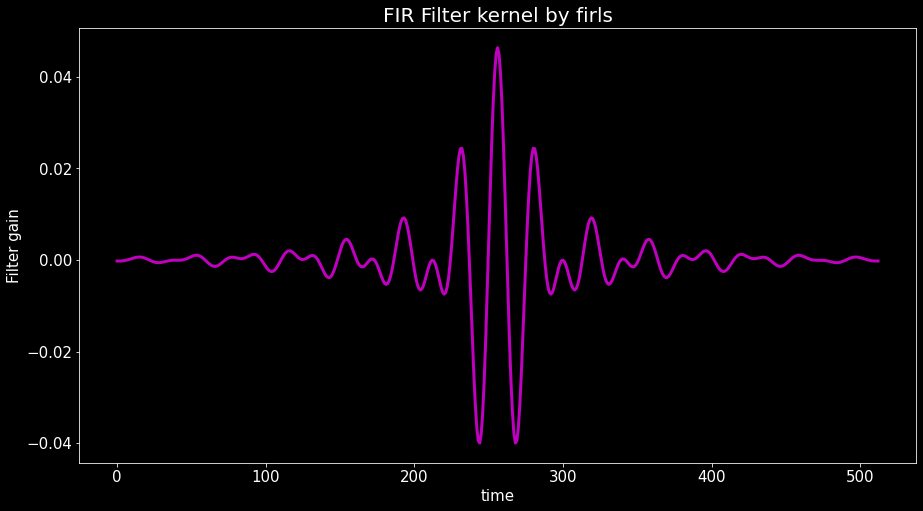

In [18]:

filt_kernel = signal.firls(order,frequencies,desired_shape,fs=srate) # Generating Filter Kernel using firls.


plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(filt_kernel,'m',linewidth =3)
plt.xlabel('time', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.title('FIR Filter kernel by firls',fontsize = 20)
plt.show()

# Step 4 : Evaluate Filter in Frequency Domain

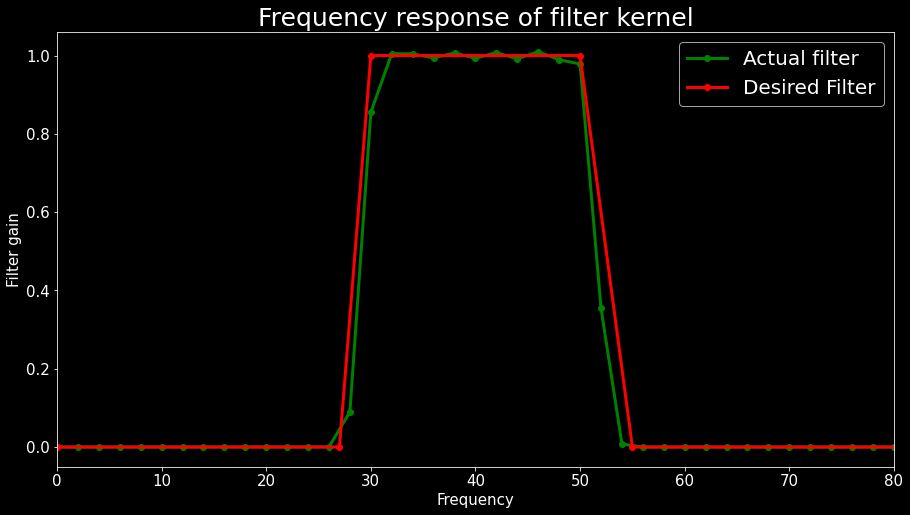

In [19]:
# Power spectrum of the filter kernel

kernel_power = np.abs(scipy.fft.fft(filt_kernel))**2

# The frequency vector
Hz  = np.linspace(0, srate/2, int(np.floor(len(filt_kernel)/2)+1))

Kernel_power = kernel_power[0:len(Hz)]



# plotting the frequency response 

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,Kernel_power,'go-',linewidth =3,label='Actual filter')
plt.plot(frequencies,desired_shape,'ro-',linewidth =3,label='Desired Filter')
plt.xlim([0,80])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.legend(fontsize = 20)
plt.title('Frequency response of filter kernel',fontsize = 25)
plt.show()


# FIR FILTER DESIGN WITH WINDOW METHOD

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

# Steps 1 and 2

## Define frequency domain shape and Cuttoffs 

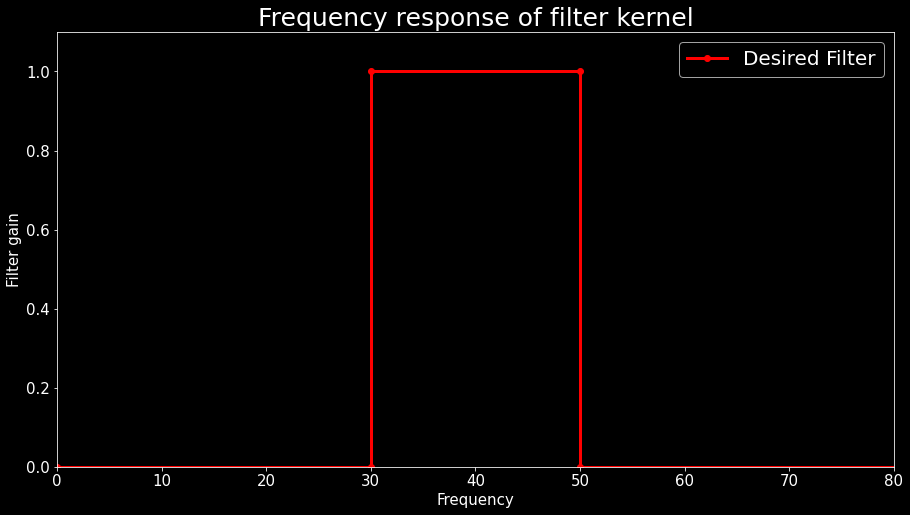

In [21]:
# Defining filter parameters for BandPass Filter

srate   = 1024 # hz
Nyquist = srate/2
cutoff  = [30,50]
order   = int( 15*srate/cutoff[0] ) 

if order % 2 == 0:
    order += 1

desired_shape = [ 0, 0, 1, 1, 0, 0 ]

frequencies = [0,cutoff[0],cutoff[0],cutoff[1],cutoff[1],Nyquist]

print(frequencies)

[0, 30, 30, 50, 50, 512.0]


# Step 3 : Generating FIR Filter Kernels

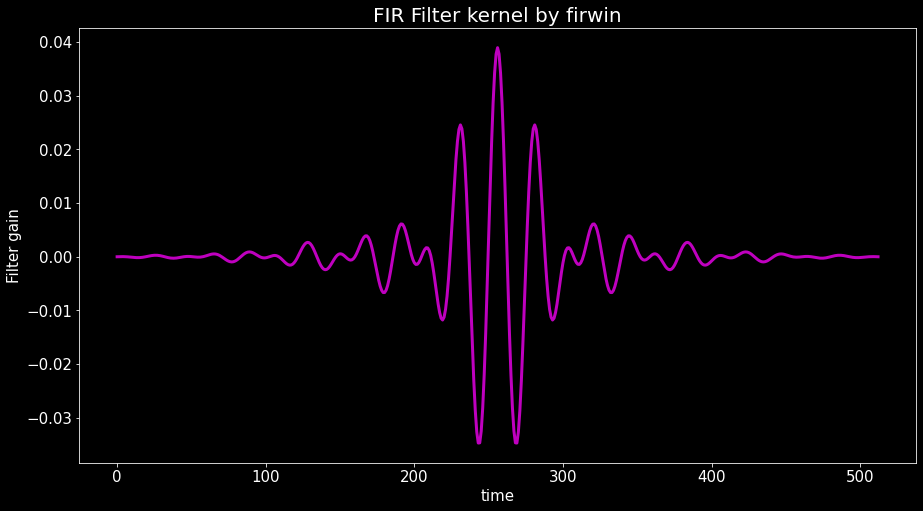

In [22]:
# filter kernel
filt_kernel = signal.firwin(order,cutoff,fs=srate,pass_zero=False)     

# firwin generates filter having no transition width. No shape input

# If True, the gain at the frequency 0 (i.e., the “DC gain”) is 1. If False, the DC gain is 0

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(filt_kernel,'m',linewidth =3)
plt.xlabel('time', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.title('FIR Filter kernel by firwin',fontsize = 20)
plt.show()

# Step 4 : Evaluate Filter in Frequency Domain

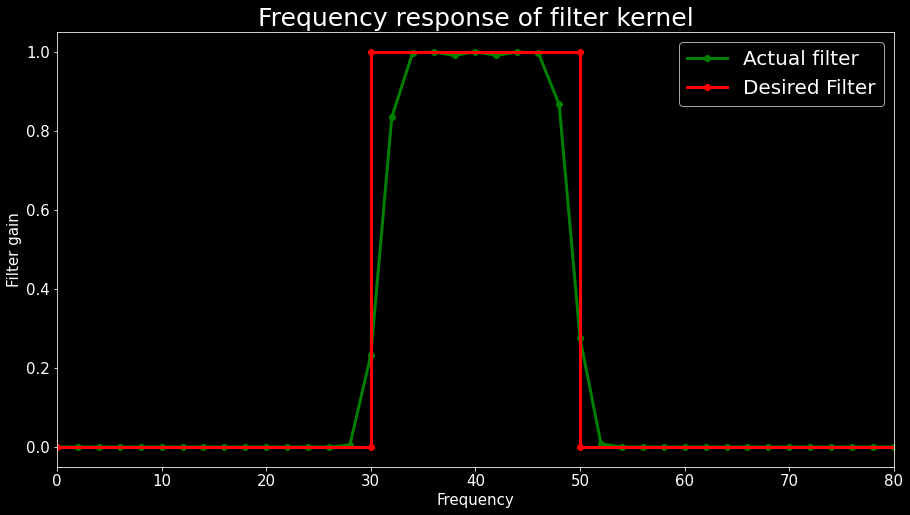

In [23]:
# Power spectrum of the filter kernel
kernel_power = np.abs(scipy.fft.fft(filt_kernel))**2

# The frequency vector
Hz  = np.linspace(0, srate/2, int(np.floor(len(filt_kernel)/2)+1))
Kernel_power = kernel_power[0:len(Hz)]



# plotting the frequenct response 

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,Kernel_power,'go-',linewidth =3,label='Actual filter')
plt.plot(frequencies,desired_shape,'ro-',linewidth =3,label='Desired Filter')
plt.xlim([0,80])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.legend(fontsize = 20)
plt.title('Frequency response of filter kernel',fontsize = 25)
plt.show()




# FIR ZERO SHIFT FILTER

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

# Signal Generation

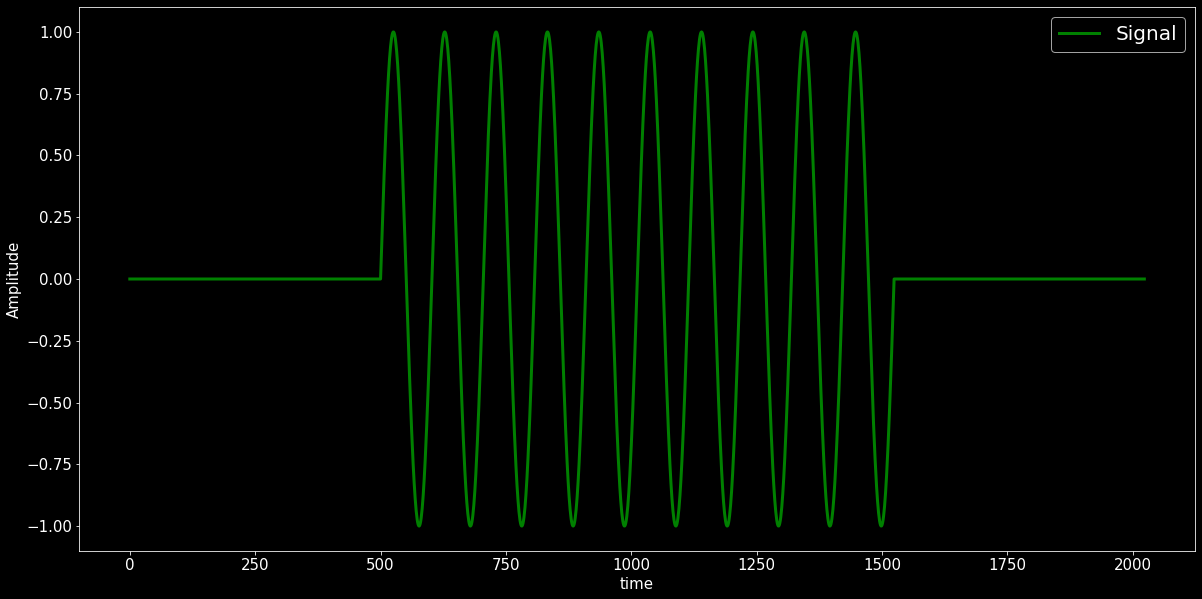

In [25]:
# Generating Signal

srate     = 1024 # hz
t = np.arange(0,1,1/srate)
pnts   = len(t)
Nyquist = srate/2

x = np.concatenate((np.zeros(500), np.sin(2*np.pi*10*t), np.zeros(500)))

# Applying a filter to a signal x

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(x,'g-',linewidth =3, label='Signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()


# Steps 1 and 2
## Define frequency domain shape, Cuttoffs and transition Width for LowPass Filter

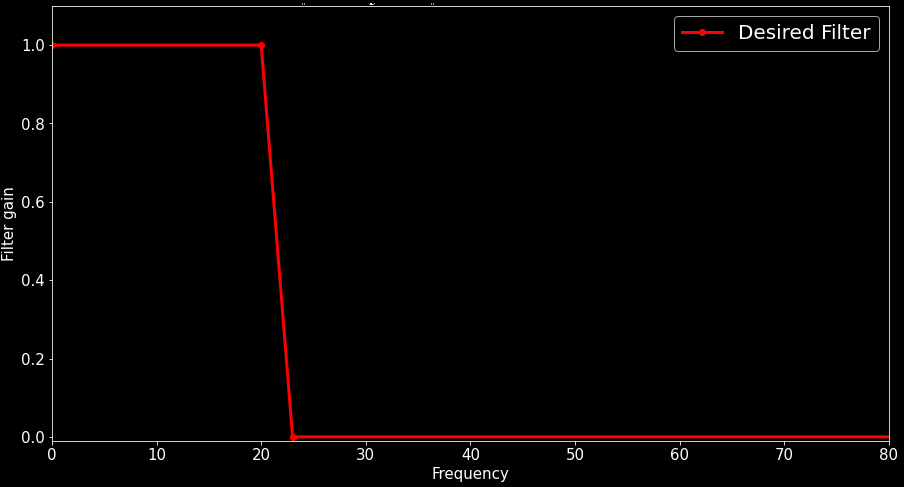

In [26]:
# Defining filter parameters for low pass filter


cutoff  = 20
transw  = 0.15
order   = np.round( 11*srate/cutoff ) 

if order % 2 == 0:
    order += 1
desired_shape   = [ 1, 1, 0, 0 ]
frequencies   = [ 0, cutoff, cutoff+cutoff*transw, Nyquist ]
print(frequencies)


[0, 20, 23.0, 512.0]


# Step 3 : Generating FIR Filter Kernels

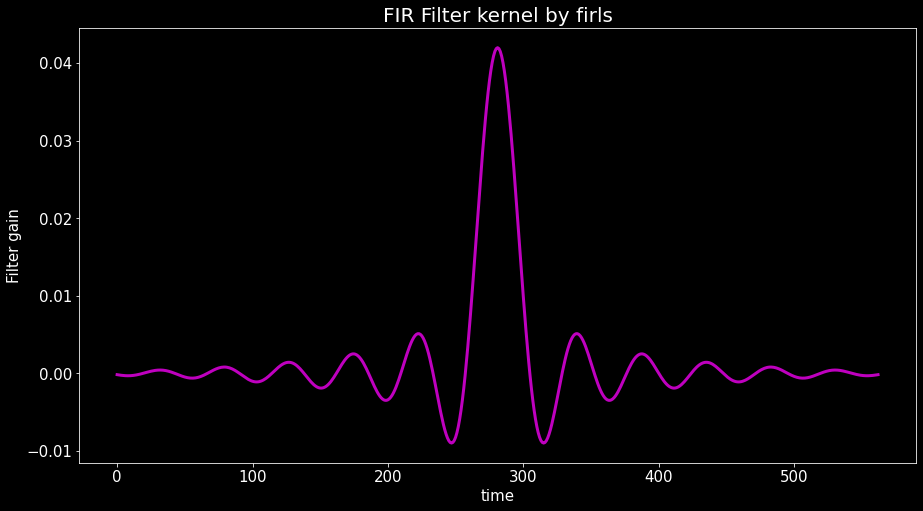

In [27]:
# filter kernel
filt_kernel = signal.firls(order,frequencies,desired_shape,fs=srate)     


plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(filt_kernel,'m',linewidth =3)
plt.xlabel('time', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.title('FIR Filter kernel by firls',fontsize = 20)
plt.show()

# Step 4 : Evaluate Filter in Frequency Domain

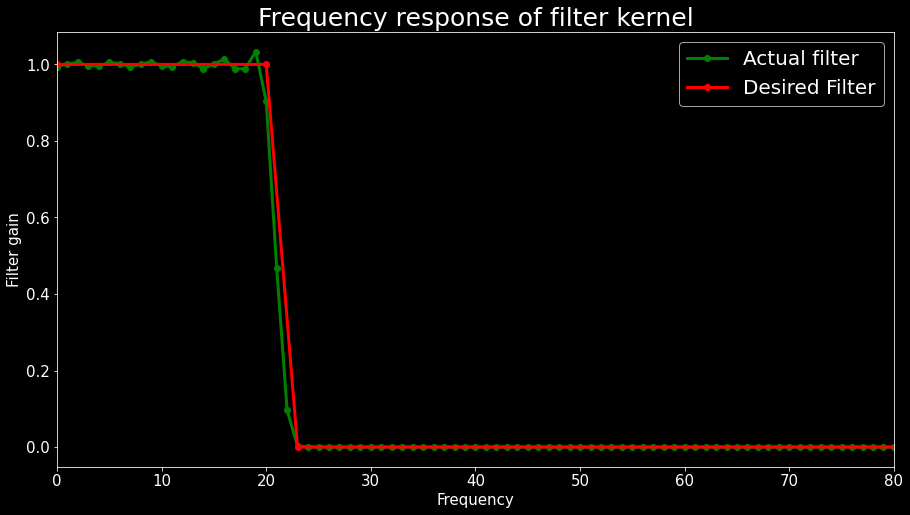

In [28]:
# Power spectrum of the filter kernel

kernel_power = np.abs(scipy.fft.fft(filt_kernel,pnts))**2

Hz  = np.linspace(0,srate/2,int(np.floor(pnts)/2)+1)
Kernel_power = kernel_power[0:len(Hz)]


# plotting the frequency response 

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,Kernel_power,'go-',linewidth =3,label='Actual filter')
plt.plot(frequencies,desired_shape,'ro-',linewidth =3,label='Desired Filter')
plt.xlim([0,80])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.legend(fontsize = 20)
plt.title('Frequency response of filter kernel',fontsize = 25)
plt.show()

# Step 5 : Apply the Evaluated Filter to the Signal

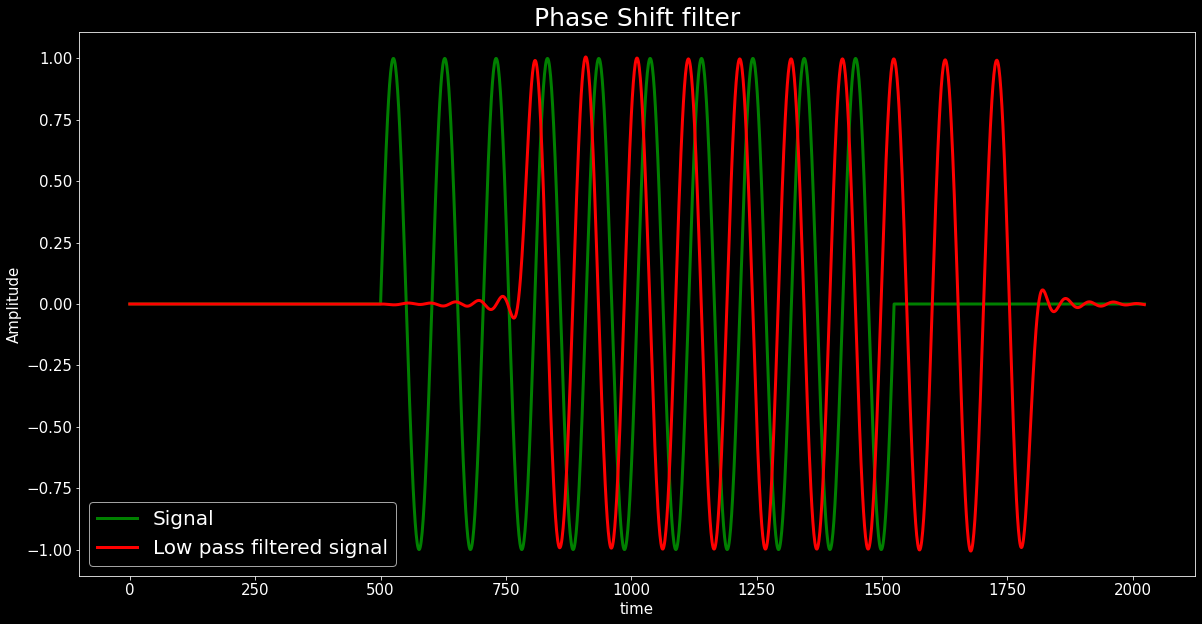

In [29]:
# Now Filtering the signal without zero shiff Filter

filt_sig = signal.lfilter(filt_kernel,1,x)

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(x,'g-',linewidth =3,label='Signal')
plt.plot(filt_sig,'r-',linewidth =3,label='Low pass filtered signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.title('Phase Shift filter', fontsize = 25)
plt.show()

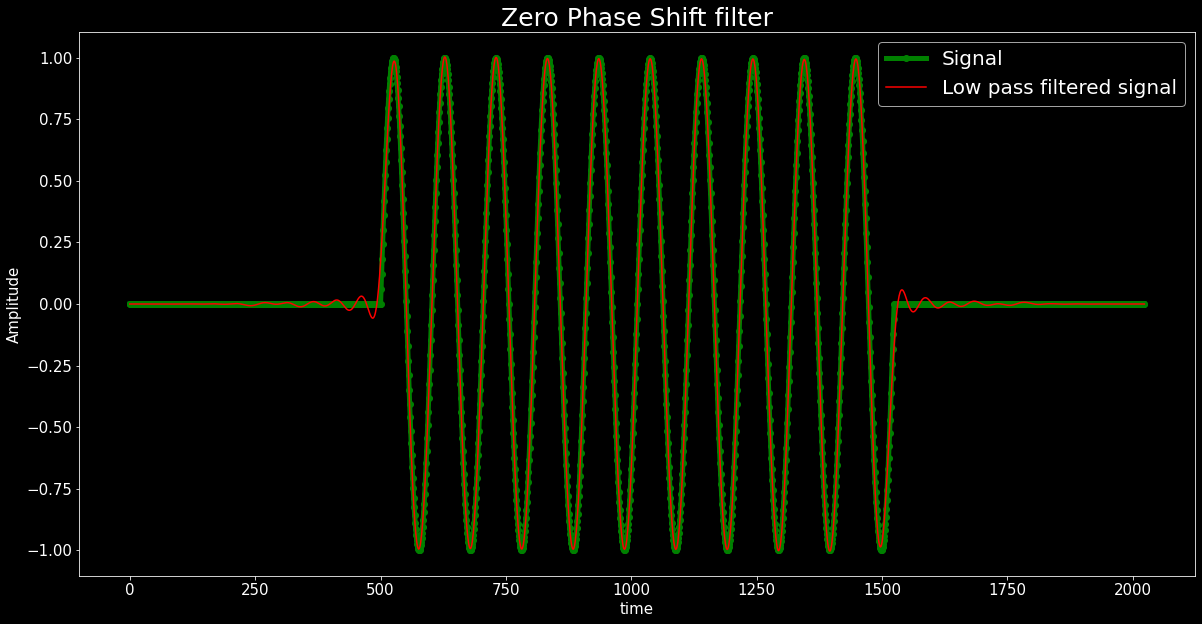

In [30]:
# Now Filtering the signal with zero shift Filter

filt_sig = signal.filtfilt(filt_kernel,1,x)

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(x,'go-',linewidth = 5,label='Signal')
plt.plot(filt_sig,'r-',label='Low pass filtered signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.title('Zero Phase Shift filter', fontsize = 25)
plt.show()
plt.show()

# Design, Evaluation and Implementation of Low pass FIR Filter

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

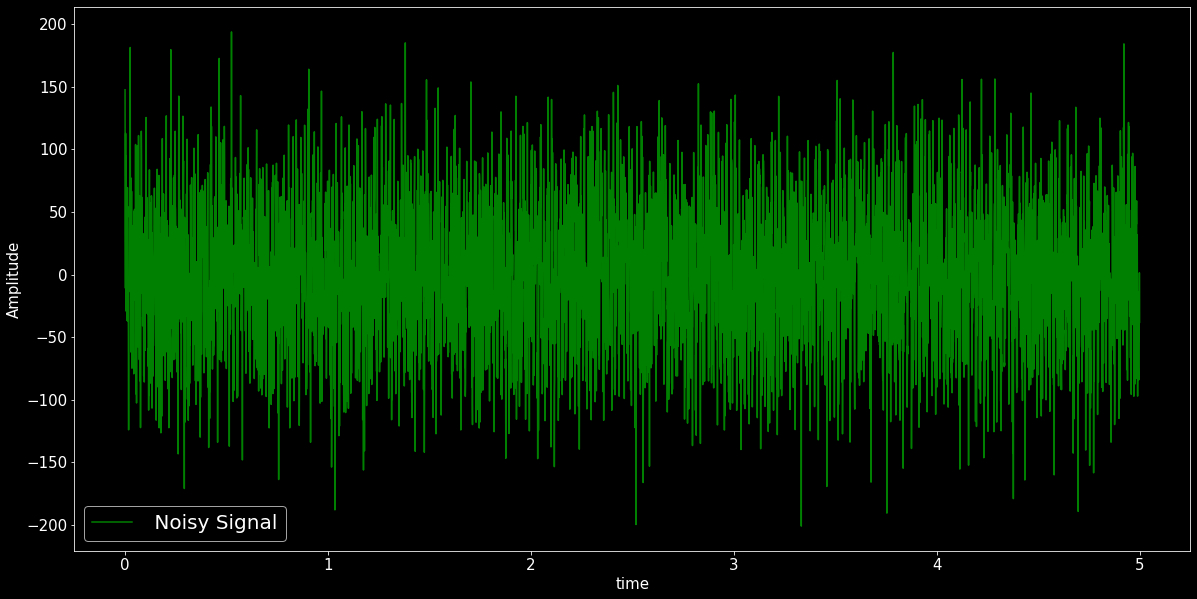

In [32]:
# Generating Signal

srate     = 1024 # hz
t = np.arange(0,5,1/srate)
pnts   = len(t)
Nyquist = srate/2

x = 40 * np.sin(2*np.pi*50*t)

noise =  50 * np.random.randn(pnts)

Nsignal     =   x + noise


plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label=' Noisy Signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()






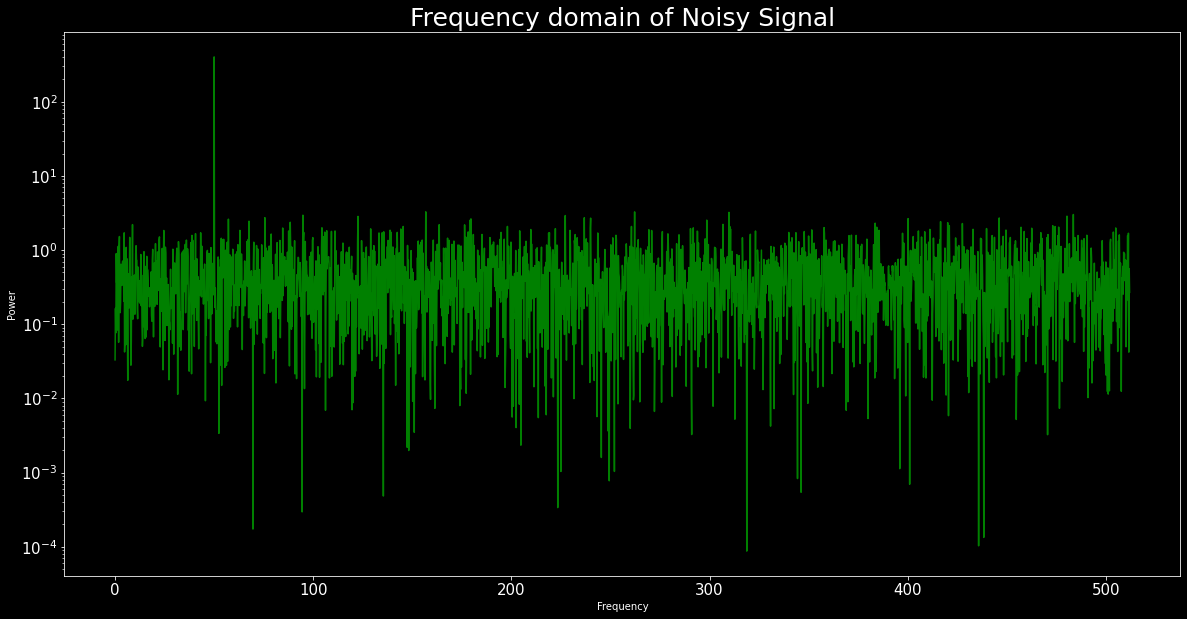

In [33]:
# Power spectrum of signal

NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
Hz = np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))

# plotting
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Frequency domain of Noisy Signal', fontsize = 25)
plt.yscale('log')
plt.show()

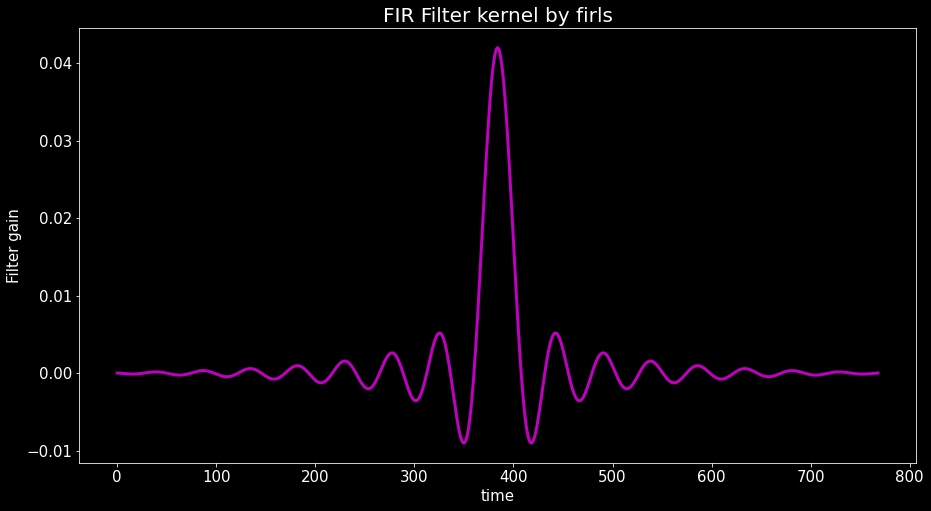

In [34]:
# Defining filter parameters

srate   = 1024 # hz
Nyquist = srate/2
cutoff  = 20
transw  = 0.15
order   = np.round( 15*srate/cutoff ) 

if order % 2 == 0:
    order += 1
    
desired_shape   = [ 1, 1, 0, 0 ]
frequencies   = [ 0, cutoff, cutoff+cutoff*transw, Nyquist ]

# filter kernel
filt_kernel = signal.firls(order,frequencies,desired_shape,fs=srate)     


plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(filt_kernel,'m',linewidth =3)
plt.xlabel('time', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.title('FIR Filter kernel by firls',fontsize = 20)
plt.show()

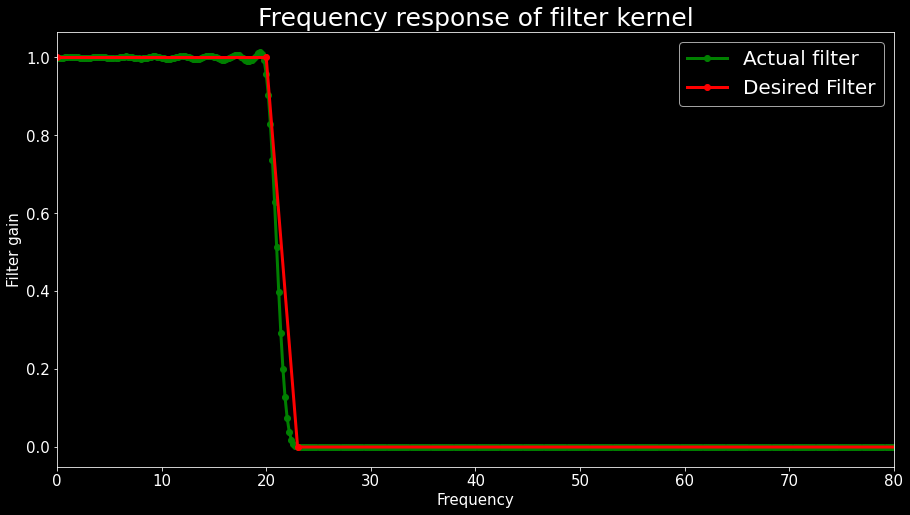

In [35]:
# Power spectrum of the filter kernel
kernel_power = np.abs(scipy.fft.fft(filt_kernel,pnts))**2


Kernel_power = kernel_power[:len(Hz)]



# plotting the frequenct response 

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,Kernel_power,'go-',linewidth =3,label='Actual filter')
plt.plot(frequencies,desired_shape,'ro-',linewidth =3,label='Desired Filter')
plt.xlim([0,80])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.legend(fontsize = 20)
plt.title('Frequency response of filter kernel',fontsize = 25)
plt.show()


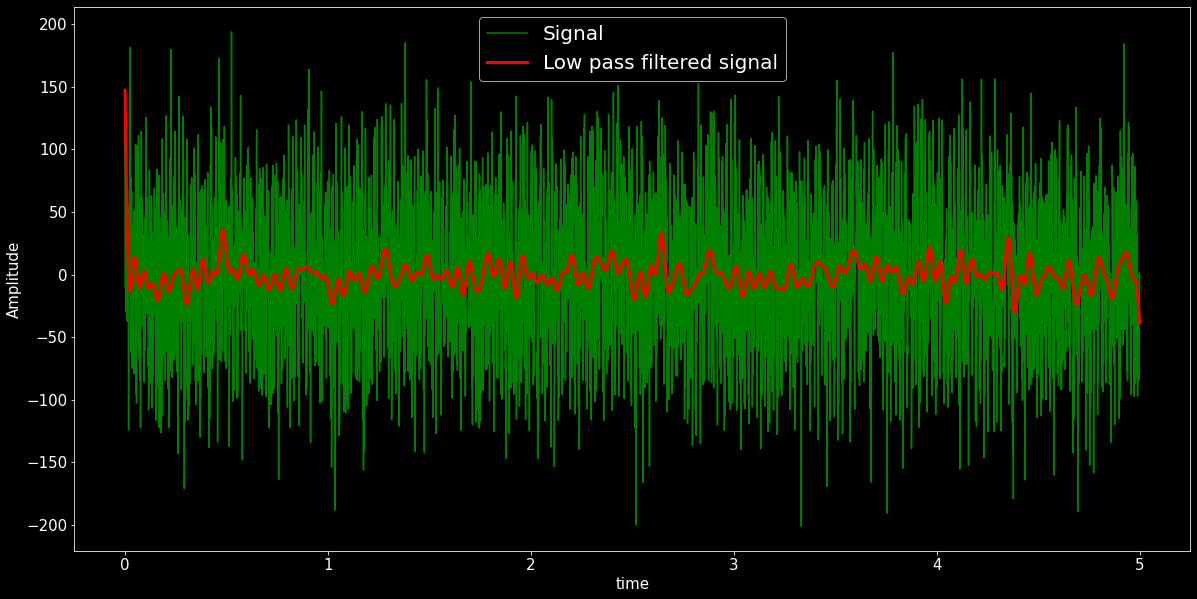

In [36]:
# Now Filtering the noisy signal
filt_sig = signal.filtfilt(filt_kernel,1,Nsignal)

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.plot(t,filt_sig,'r-',linewidth =3,label='Low pass filtered signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()



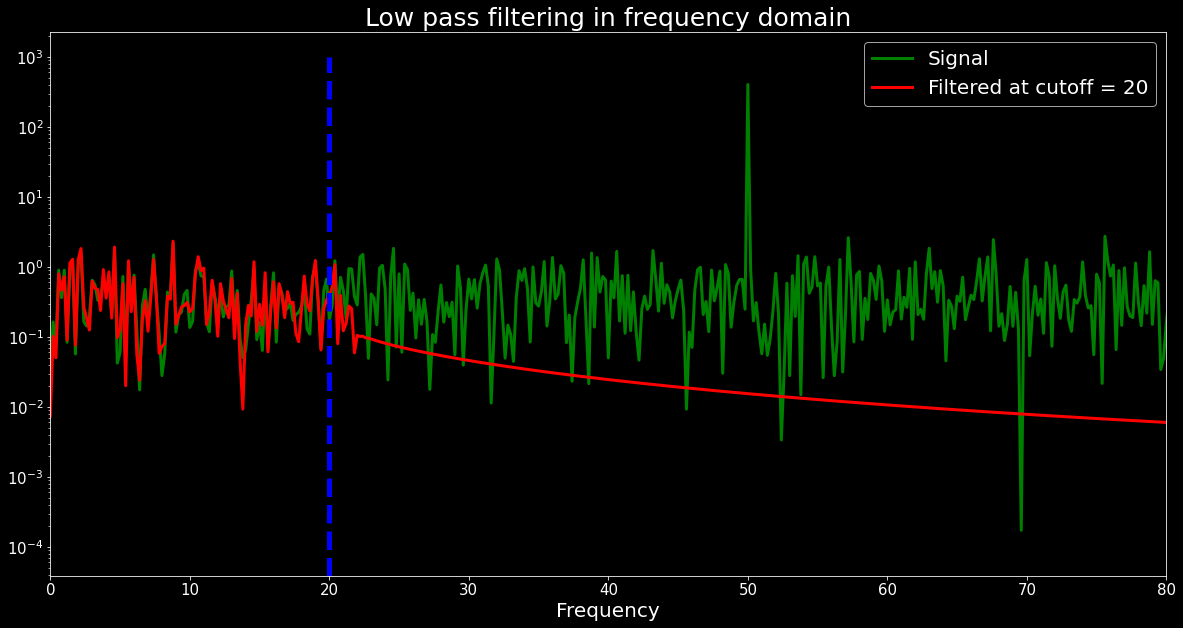

In [37]:
# power spectra of original and filtered signal

NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
filt_sigX = np.abs(scipy.fft.fft(filt_sig)/pnts)**2

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g',linewidth =3,label='Signal')
plt.plot(Hz,filt_sigX[0:len(Hz)],'r',linewidth =3,label='Filtered at cutoff = 20')
plt.plot([cutoff,cutoff],[0,1000],'b--',linewidth =5)
plt.xlim([0,80])
plt.yscale('log')
plt.legend(fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.title('Low pass filtering in frequency domain', fontsize = 25)
plt.show()

# Design, Evaluation and Implementation of  High pass FIR Filter

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

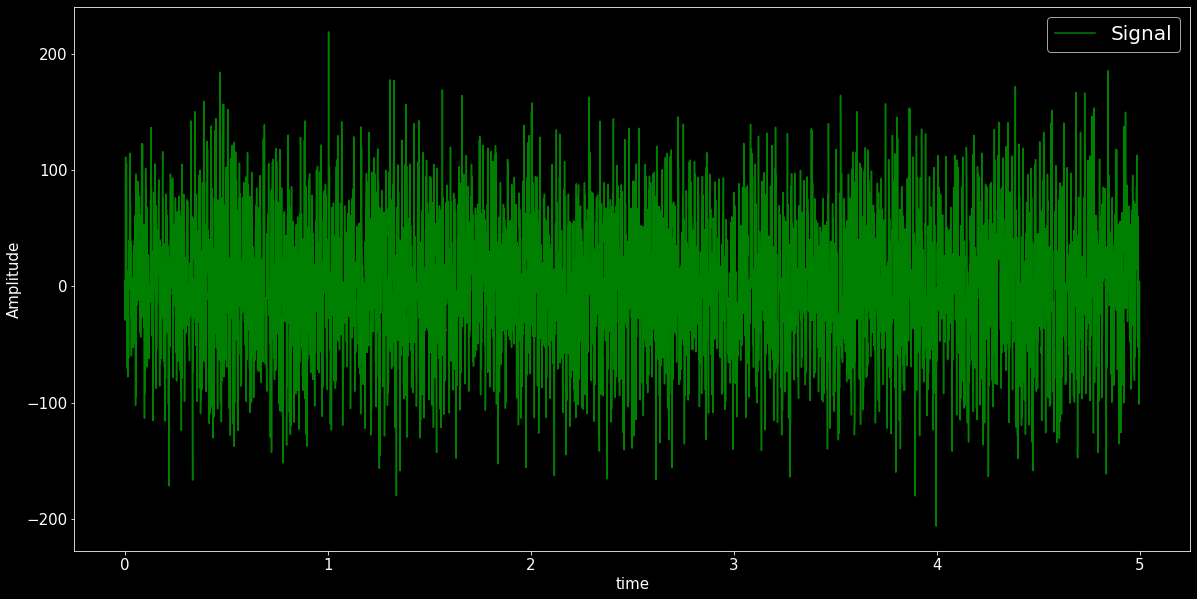

In [39]:
# Generating Signal

srate     = 1024 # hz
t = np.arange(0,5,1/srate)
pnts   = len(t)
Nyquist = srate/2

x = 40 * np.sin(2*np.pi*50*t)

noise =  50 * np.random.randn(pnts)

Nsignal     =   x + noise


plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()

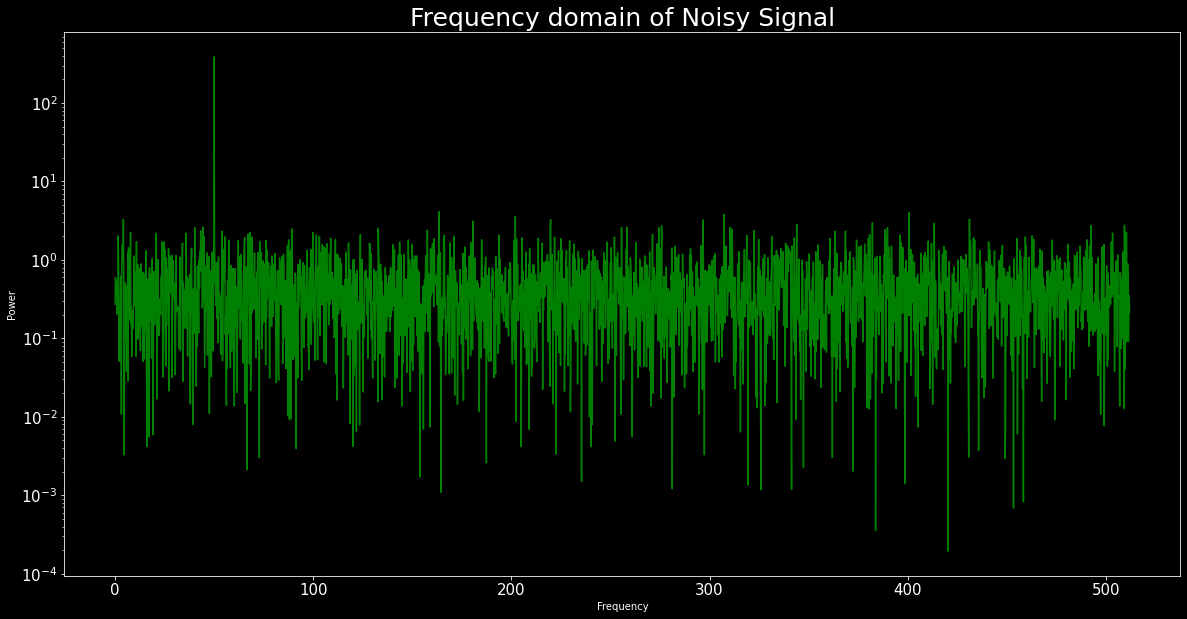

In [40]:
# Power spectrum of signal

NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
Hz = np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))

# plotting
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Frequency domain of Noisy Signal', fontsize =25)
plt.yscale('log')
plt.show()

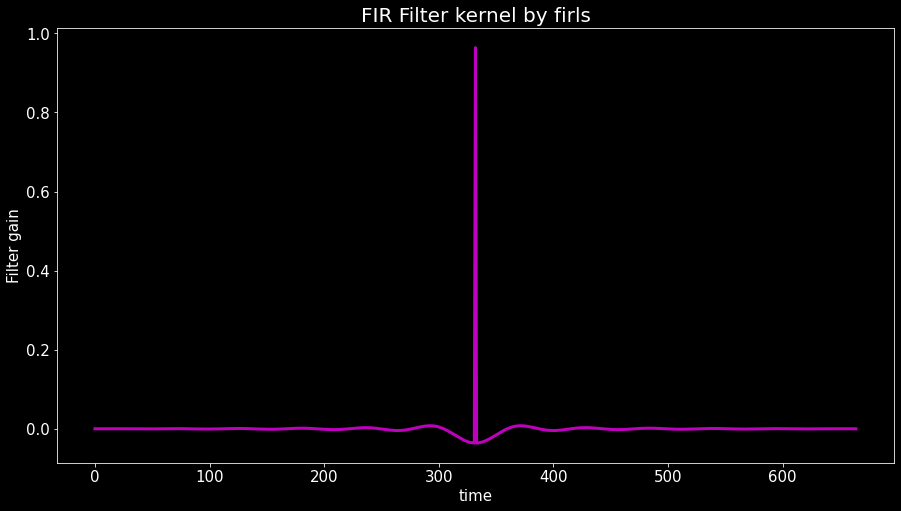

In [41]:
# Defining filter parameters

srate   = 1024 # hz
Nyquist = srate/2
cutoff  = 20
transw  = 0.15
order   = int( 13 * srate/cutoff ) 

if order % 2 == 0:
    order += 1
    
desired_shape   = [ 0, 0, 1, 1 ]
frequencies   = [ 0, cutoff-cutoff*transw, cutoff, Nyquist ]

# filter kernel
filt_kernel = signal.firls(order,frequencies,desired_shape,fs=srate)     


plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(filt_kernel,'m',linewidth =3)
plt.xlabel('time', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.title('FIR Filter kernel by firls',fontsize = 20)
plt.show()

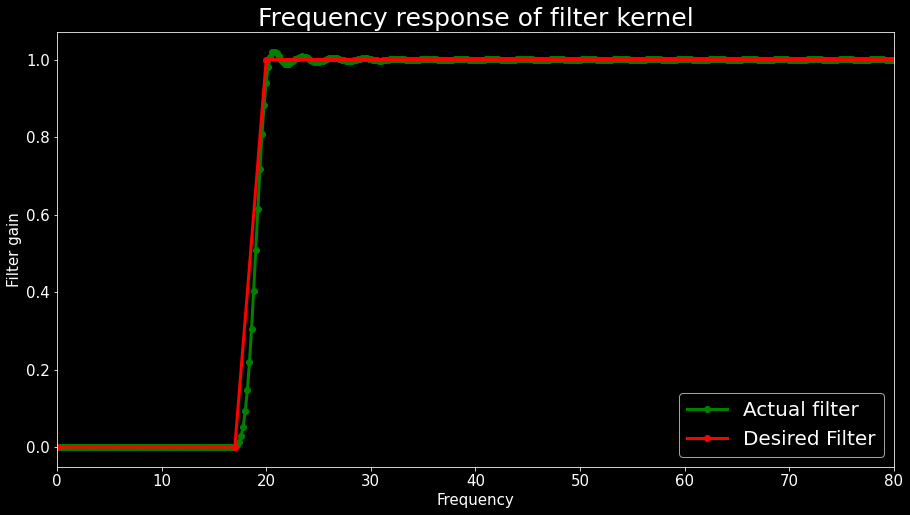

In [42]:
# Power spectrum of the filter kernel
kernel_power = np.abs(scipy.fft.fft(filt_kernel,pnts))**2


Kernel_power = kernel_power[:len(Hz)]
Hz = np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))


# plotting the frequenct response 

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,Kernel_power,'go-',linewidth =3,label='Actual filter')
plt.plot(frequencies,desired_shape,'ro-',linewidth =3,label='Desired Filter')
plt.xlim([0,80])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.legend(fontsize = 20)
plt.title('Frequency response of filter kernel',fontsize = 25)
plt.show()

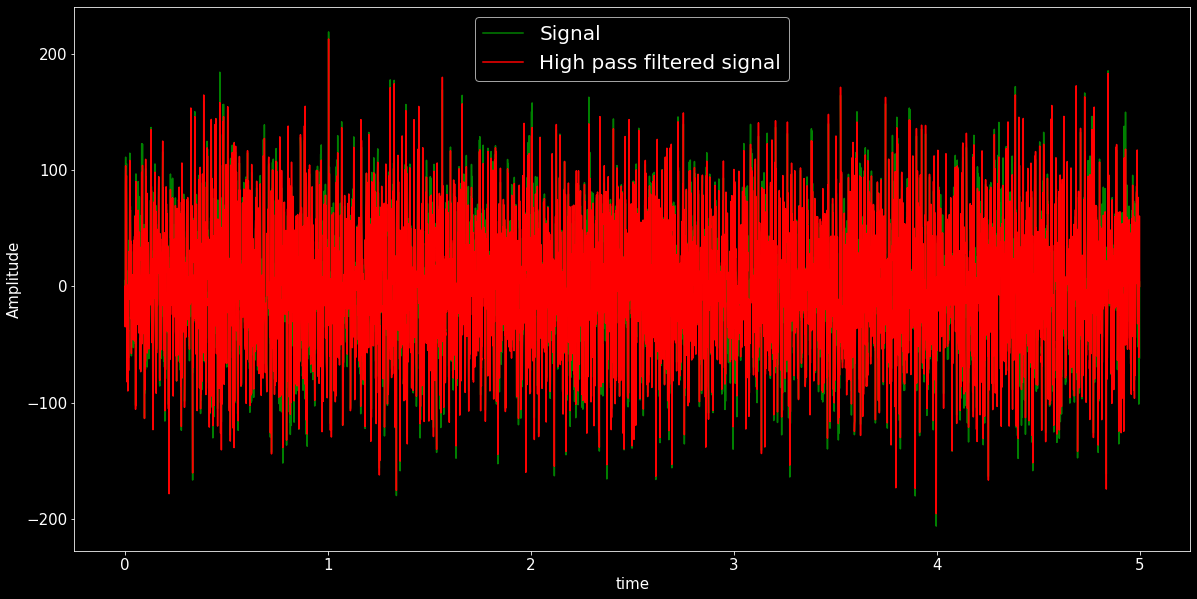

In [43]:
# Now Filtering the noisy signal
filt_sig = signal.filtfilt(filt_kernel,1,Nsignal)

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.plot(t,filt_sig,'r-',label='High pass filtered signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()


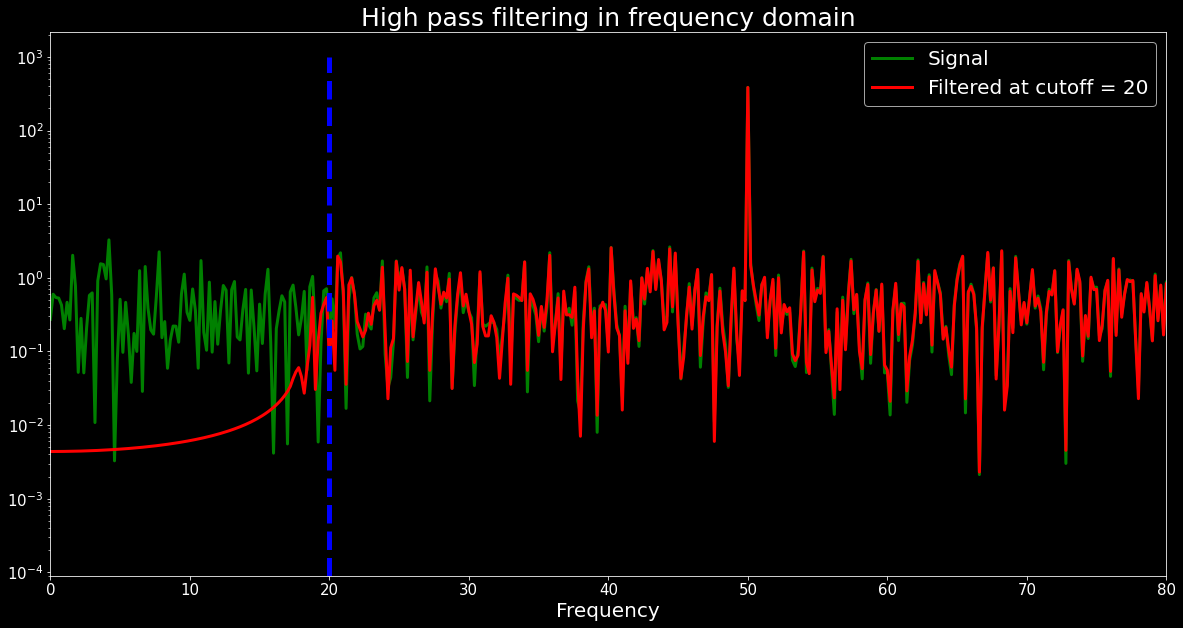

In [44]:
# power spectra of original and filtered signal
NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
filt_sigX = np.abs(scipy.fft.fft(filt_sig)/pnts)**2

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g',linewidth =3,label='Signal')
plt.plot(Hz,filt_sigX[0:len(Hz)],'r',linewidth =3,label='Filtered at cutoff = 20')
plt.plot([cutoff,cutoff],[0,1000],'b--',linewidth =5)
plt.xlim([0,80])
plt.yscale('log')
plt.legend(fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.title('High pass filtering in frequency domain', fontsize = 25)
plt.show()

# Design, Evaluation and Implementation of Band pass FIR Filter

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

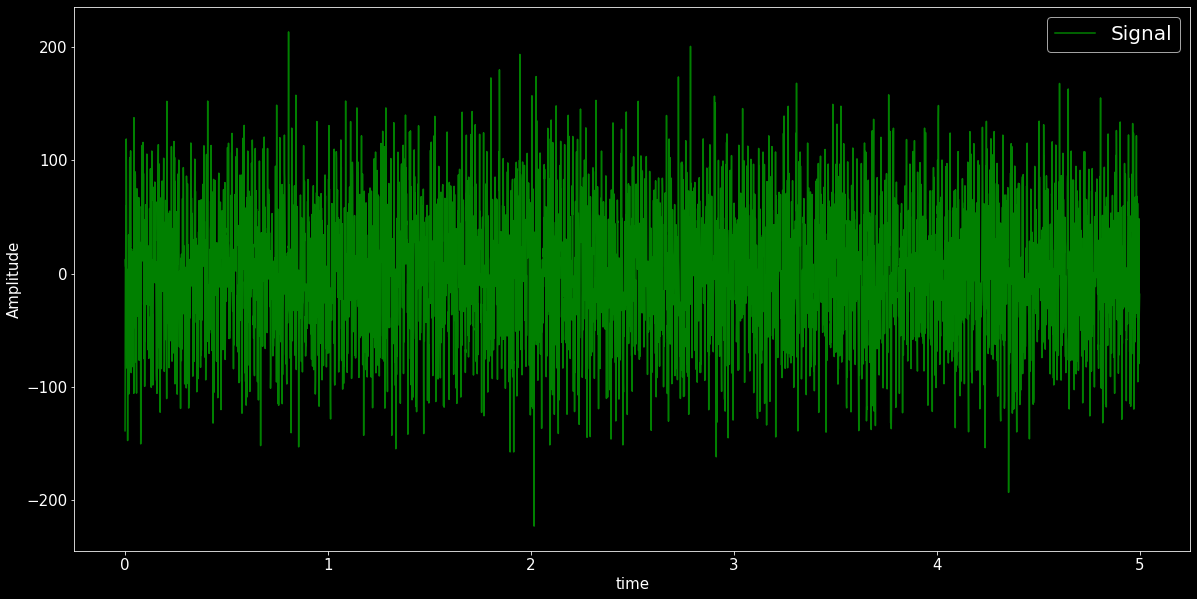

In [46]:
# Generating Signal

srate     = 1024 # hz
t = np.arange(0,5,1/srate)
pnts   = len(t)
Nyquist = srate/2

x = 40*np.sin(2*np.pi*50*t)

noise =  50*np.random.randn(pnts)

Nsignal     =   x + noise


plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()

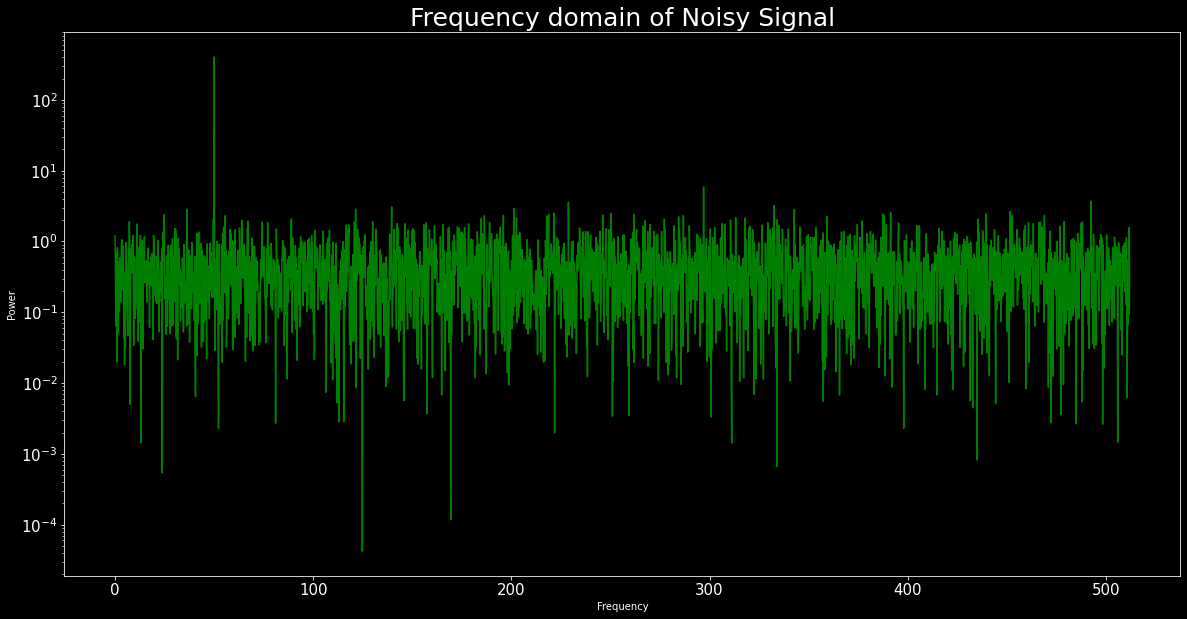

In [47]:
# Power spectrum of signal

NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
Hz = np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))

# plotting
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Frequency domain of Noisy Signal', fontsize =25)
plt.yscale('log')
plt.show()

In [48]:
# Defining Filter parameters

srate   = 1024 # Hz
Nyquist = srate/2 # Nyquist rate is very important parameter for filter design.
cutoff  = [30,50] # These are two cutoff frequencies i.e lower = 20  and upper = 45
transw  = 0.1  # Transition width is 10 %
order   = int( 21*srate/cutoff[0] ) # order parameter is also very important. Here order is taken as 9 times the sampling rate
                                       # and then divide with lowest frequency.Filter order is also called filter taps

    

# order must be odd
if order % 2 == 0:
    order += 1

# Other filter parameters

desired_shape = [ 0, 0, 1, 1, 0, 0 ]
frequencies = [0, cutoff[0]-cutoff[0]*transw, cutoff[0], cutoff[1], cutoff[1]+cutoff[1]*transw, Nyquist]



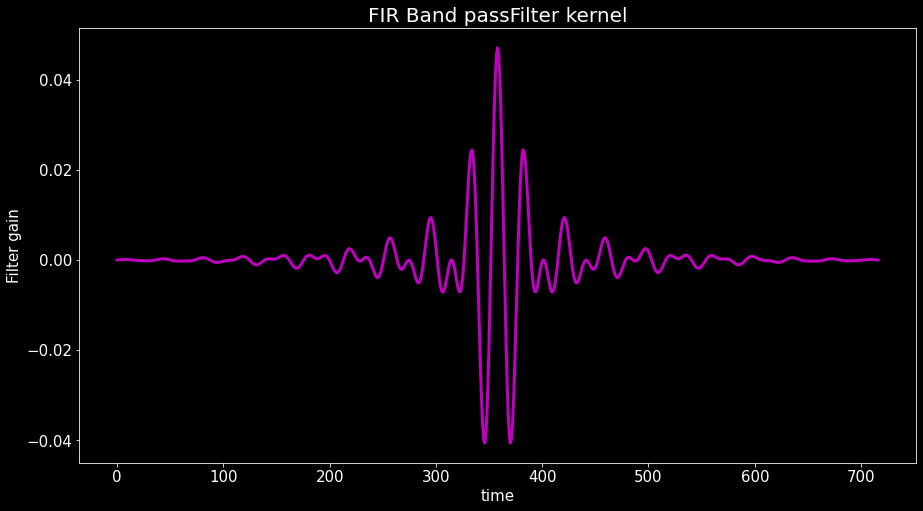

In [49]:
# Genrating FIR filter kernel

filt_kernel = signal.firls(order,frequencies,desired_shape,fs=srate) # Generating Filter Kernel using firls.


plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(filt_kernel,'m',linewidth =3)
plt.xlabel('time', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.title('FIR Band passFilter kernel',fontsize = 20)
plt.show()

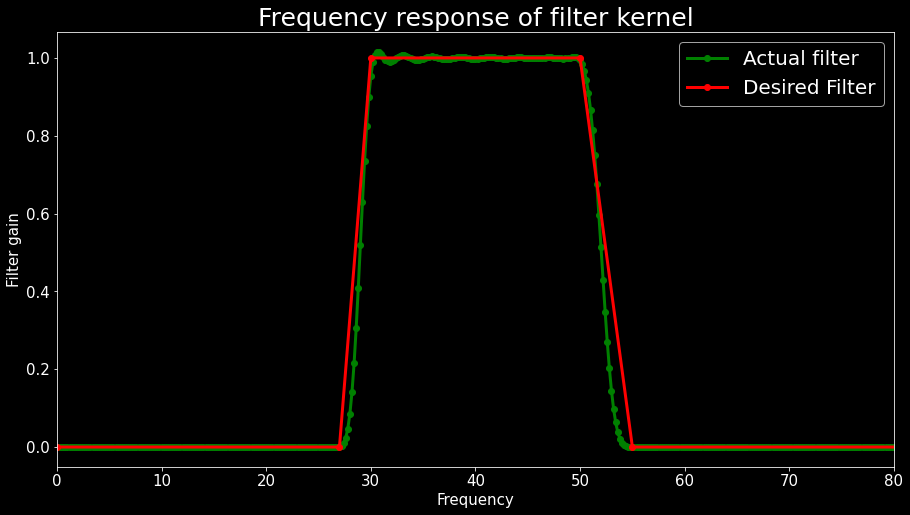

In [50]:
# Power spectrum of the filter kernel
kernel_power = np.abs(scipy.fft.fft(filt_kernel,pnts))**2

# The frequency vector
#Hz  = np.linspace(0,srate/2,int(np.floor(len(filt_kernel)/2)+1))
Kernel_power = kernel_power[0:len(Hz)]



# plotting the frequency response 

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,Kernel_power,'go-',linewidth =3,label='Actual filter')
plt.plot(frequencies,desired_shape,'ro-',linewidth =3,label='Desired Filter')
plt.xlim([0,80])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Filter gain', fontsize =15)
plt.legend(fontsize = 20)
plt.title('Frequency response of filter kernel',fontsize = 25)
plt.show()

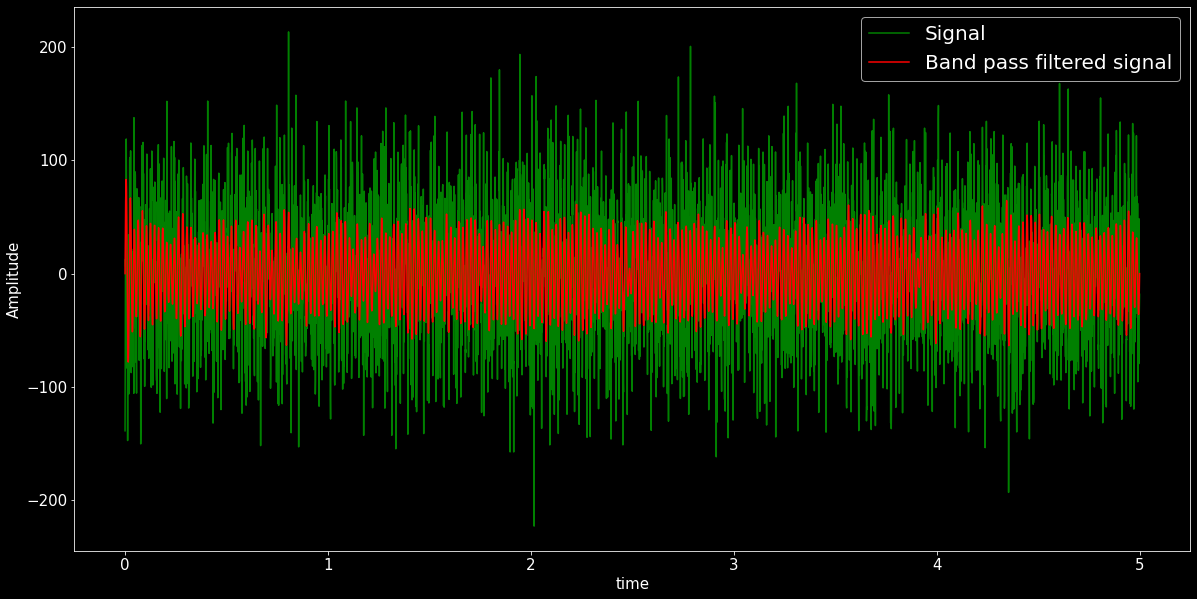

In [51]:
# Now Filtering the noisy signal
filt_sig = signal.filtfilt(filt_kernel,1,Nsignal)

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.plot(t,filt_sig,'r-',label='Band pass filtered signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()

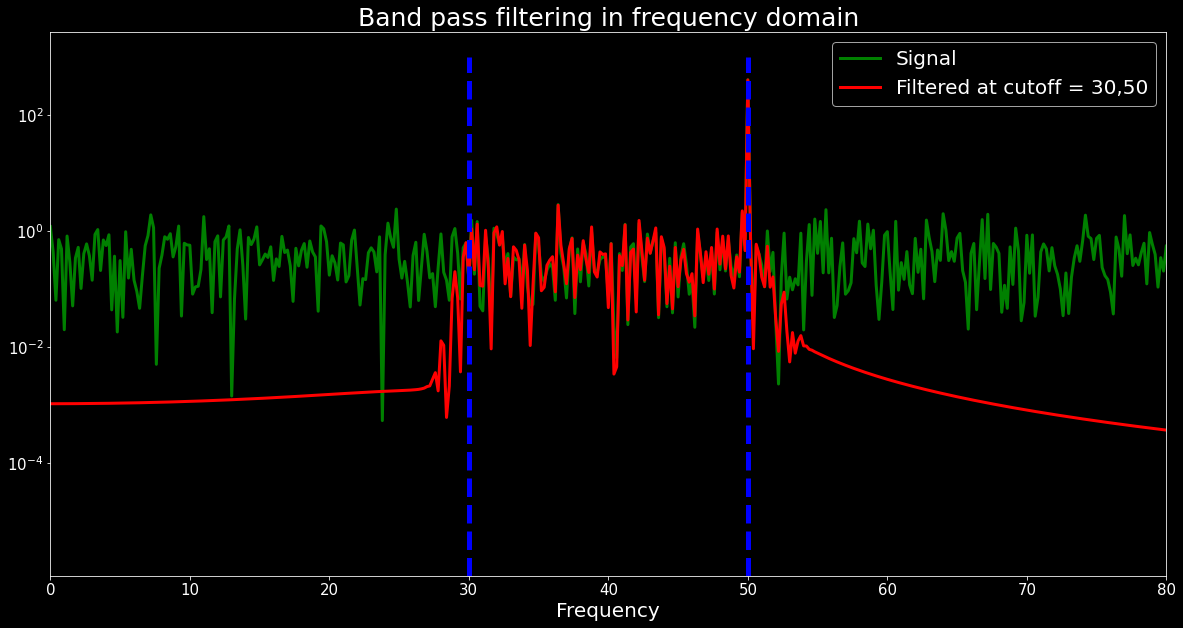

In [52]:
# power spectra of original and filtered signal
NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
filt_sigX = np.abs(scipy.fft.fft(filt_sig)/pnts)**2

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g',linewidth =3,label='Signal')
plt.plot(Hz,filt_sigX[0:len(Hz)],'r',linewidth =3,label='Filtered at cutoff = 30,50')
plt.plot([cutoff[0],cutoff[0]],[0,1000],'b--',linewidth =5)
plt.plot([cutoff[1],cutoff[1]],[0,1000],'b--',linewidth =5)
plt.xlim([0,80])
plt.yscale('log')
plt.legend(fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.title('Band pass filtering in frequency domain', fontsize = 25)
plt.show()